In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [11]:
df = pd.read_csv('Diwali Sales Data.csv', encoding = 'unicode_escape')
#to avoid encoding error, use unicode escape

In [12]:
df.shape
#will show number of rows and columns

(11251, 15)

In [13]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
df.drop(['Status', 'unnamed1'], axis=0, inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [26]:
#check null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [27]:
#drop null values
df.dropna(inplace=True)

In [31]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [32]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [33]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [34]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


Exploratory Data Analysis

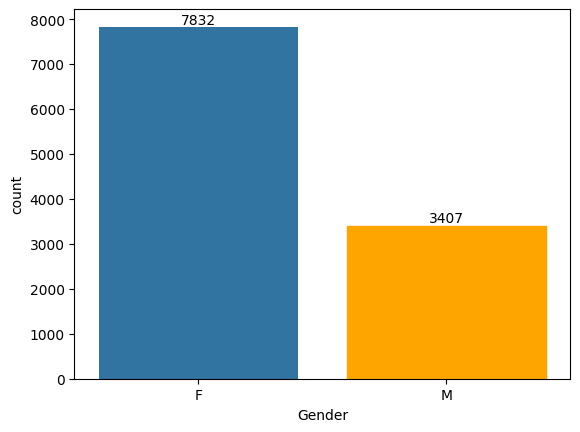

In [41]:
ax = sns.countplot(x = 'Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

bar_index_to_change = 1  # Index of the bar you want to change (0-indexed)
new_color = 'orange'  # New color for the bar
bars[bar_index_to_change].set_color(new_color)

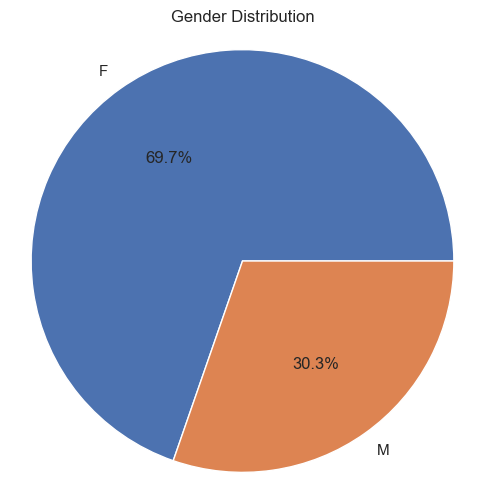

In [99]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')  # Create the pie chart
plt.title('Gender Distribution')  # Set the title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()  # Display the plot

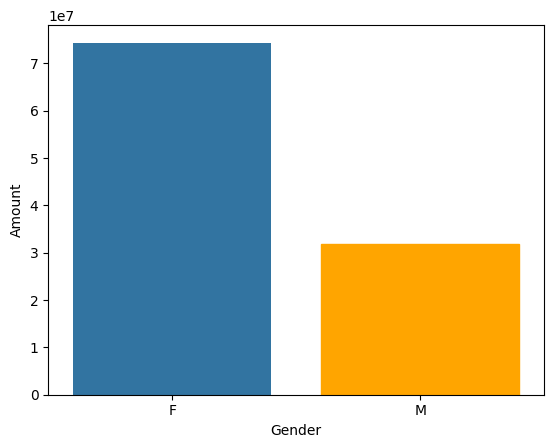

In [45]:
sales_gender = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

ax = sns.barplot(x = 'Gender', y = 'Amount', data = sales_gender)
bars = ax.patches

bar_index_to_change = 1  # Index of the bar you want to change (0-indexed)
new_color = 'orange'  # New color for the bar
bars[bar_index_to_change].set_color(new_color)

From the above illustrations, we can see that most of the buyers are females and the purchasing power of females is greater than men

Age

In [47]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

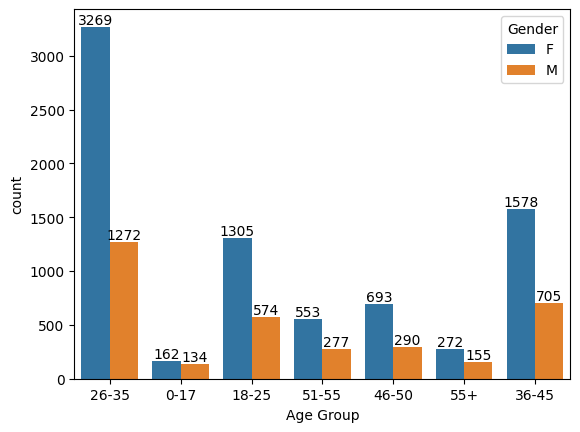

In [46]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

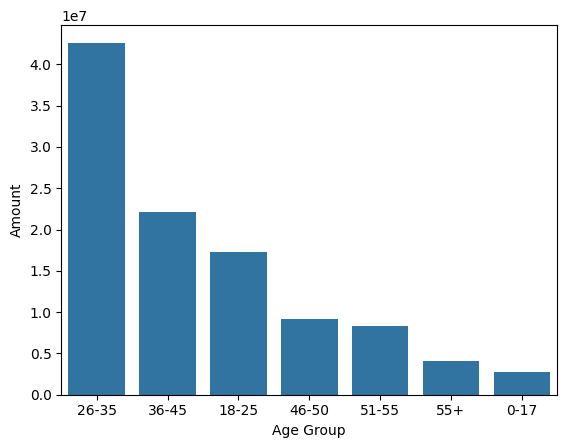

In [53]:
#Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age)

Most of the buyers are between the agegroup of 26 - 35 years

State

In [54]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

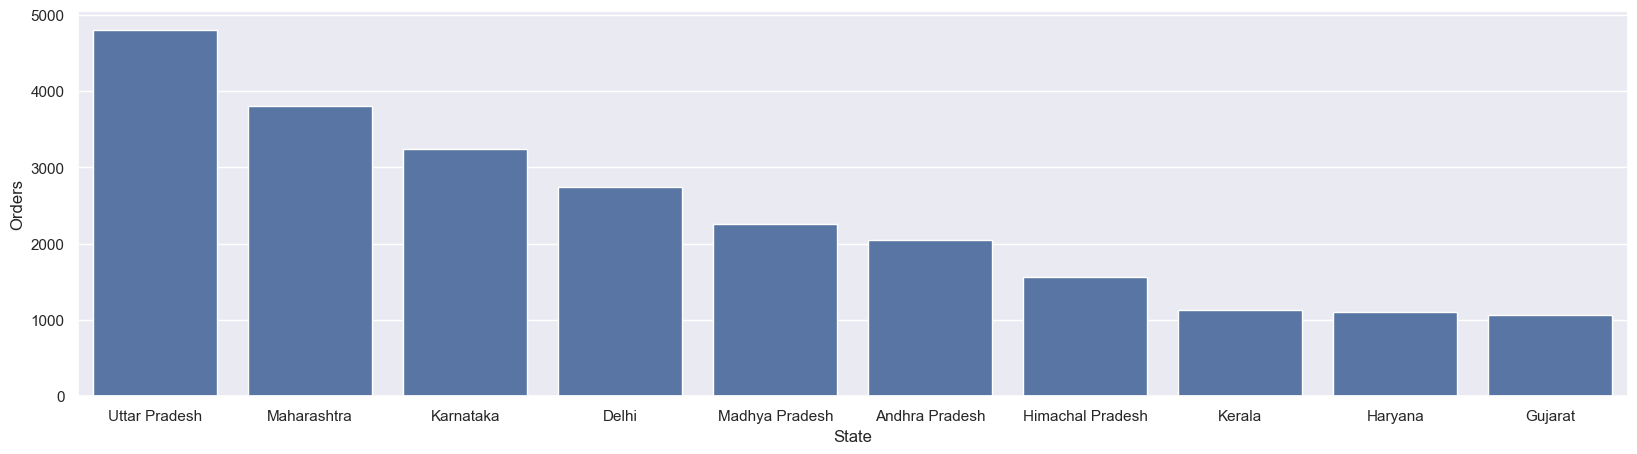

In [60]:
#Total number of orders for top 10 states
orders_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20, 5)})
sns.barplot(x = 'State', y = 'Orders', data = orders_state)

<Axes: xlabel='State', ylabel='Amount'>

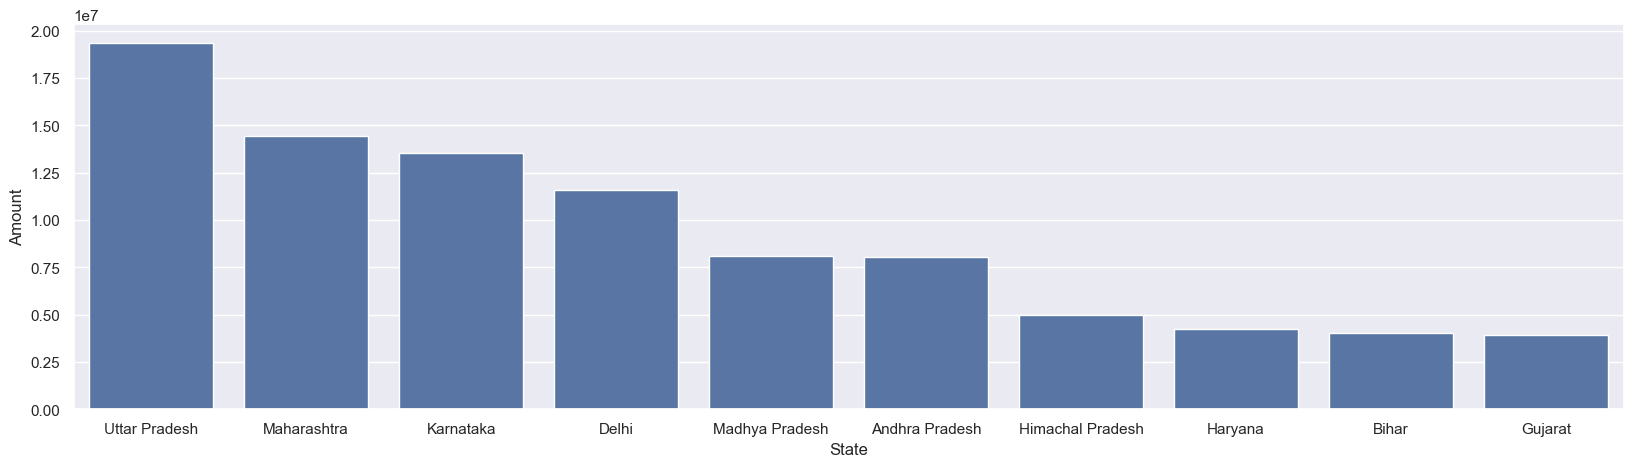

In [61]:
#Total amount/sales for top 10 states
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20, 5)})
sns.barplot(x = 'State', y = 'Amount', data = sales_state)

Here, we can see that the maximum number of orders are from Uttar Pradesh, Maharashtra and Karnataka. The highest amount of sales is also from 
these three states.

Marital Status

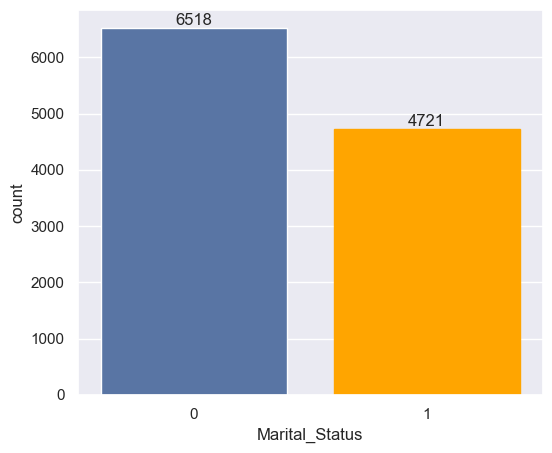

In [70]:
ax = sns.countplot(data = df, x = 'Marital_Status')
sns.set(rc={'figure.figsize':(2, 5)})

for bars in ax.containers:
    ax.bar_label(bars)

bar_index_to_change = 1  # Index of the bar you want to change (0-indexed)
new_color = 'orange'  # New color for the bar
bars[bar_index_to_change].set_color(new_color)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

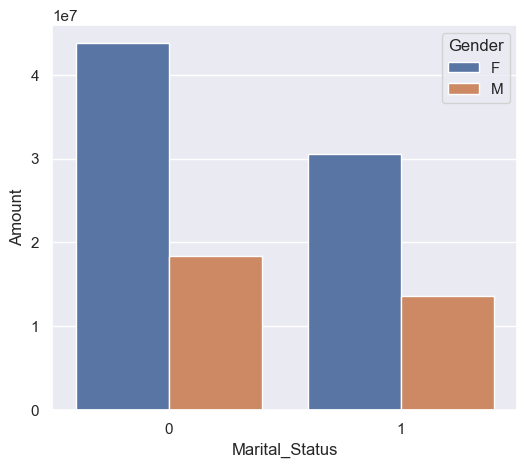

In [69]:
sales_marital = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(6, 5)})

sns.barplot(data = sales_marital, x = 'Marital_Status', y = 'Amount', hue = 'Gender')

Most of the buyers are married women and they have higher purchasing power.

Occupation

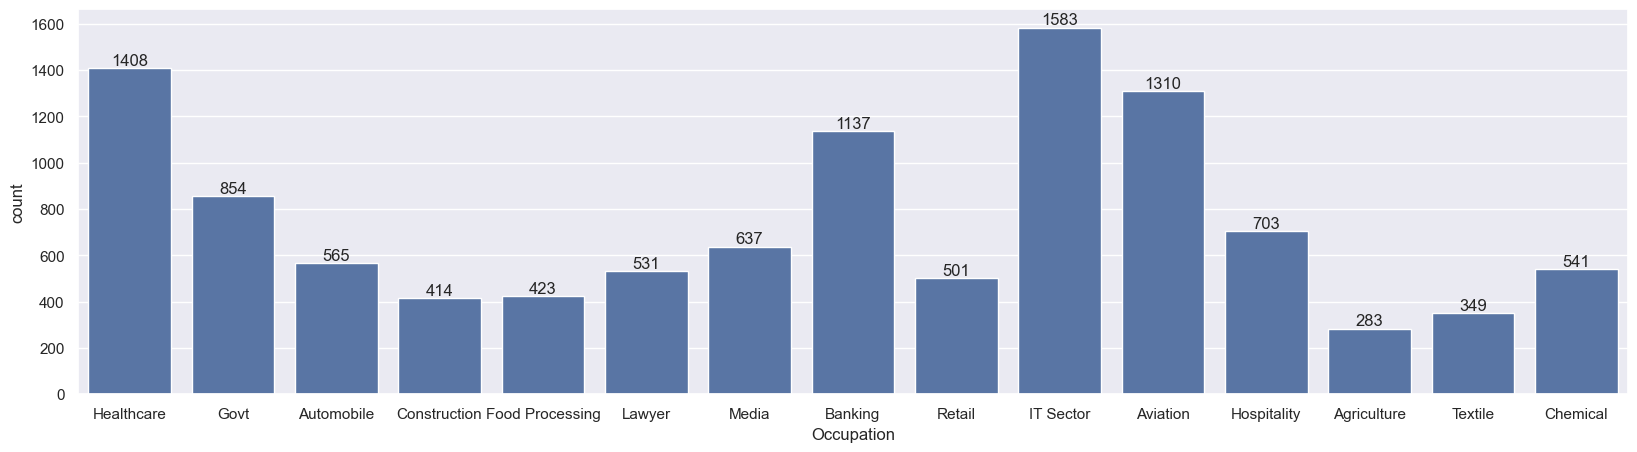

In [71]:
sns.set(rc={'figure.figsize':(20, 5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

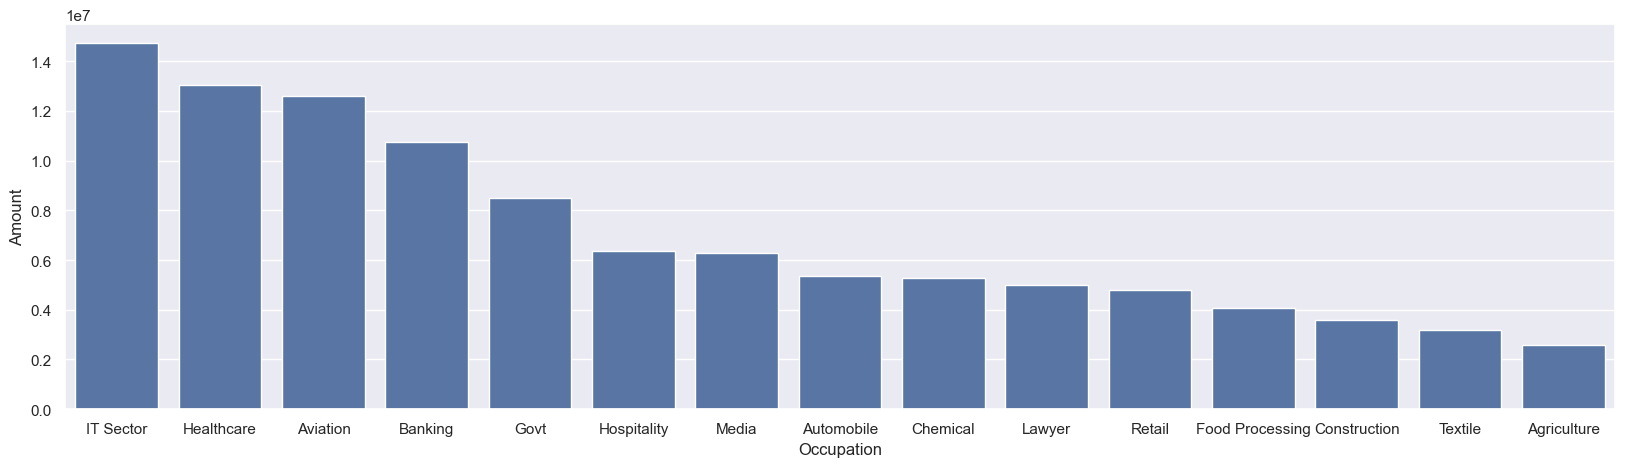

In [72]:
sales_occupation = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(20, 5)})

sns.barplot(data = sales_occupation, x = 'Occupation', y = 'Amount')

Most buyers are working in the IT, Aviation and Healthcare industries.

Product Category

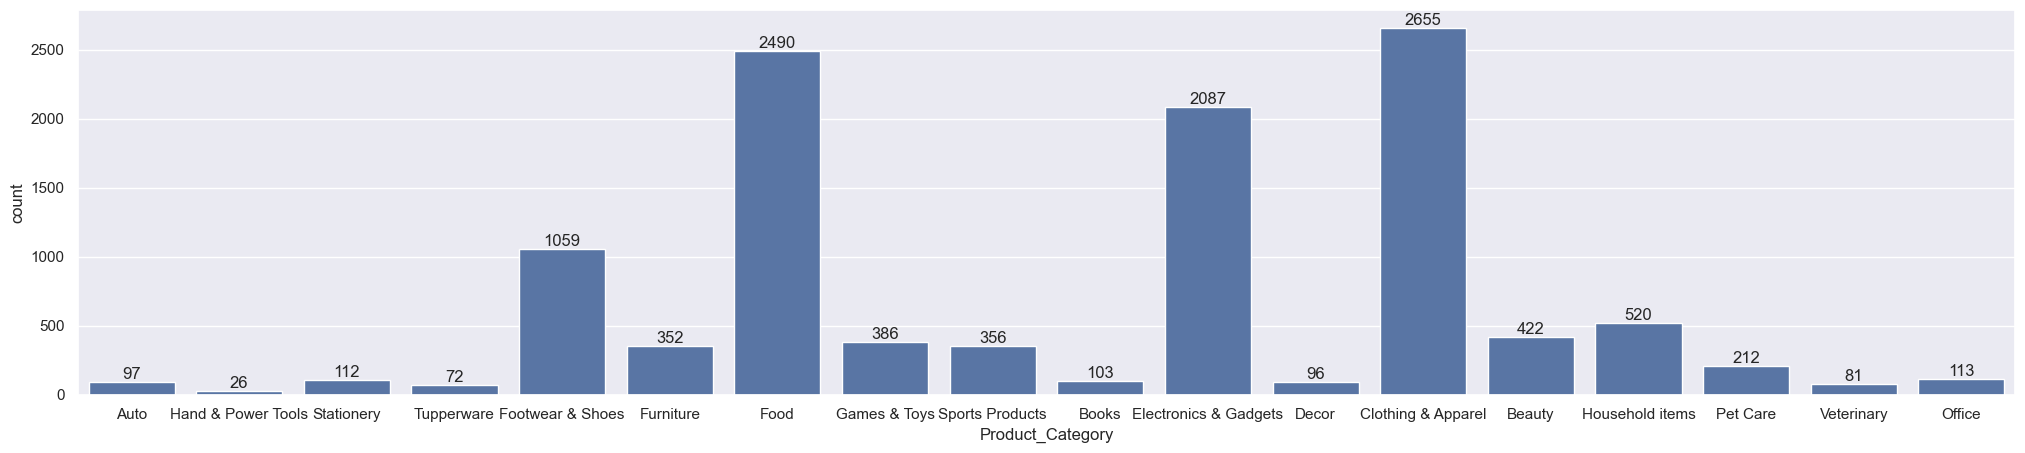

In [77]:
sns.set(rc={'figure.figsize':(25, 5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

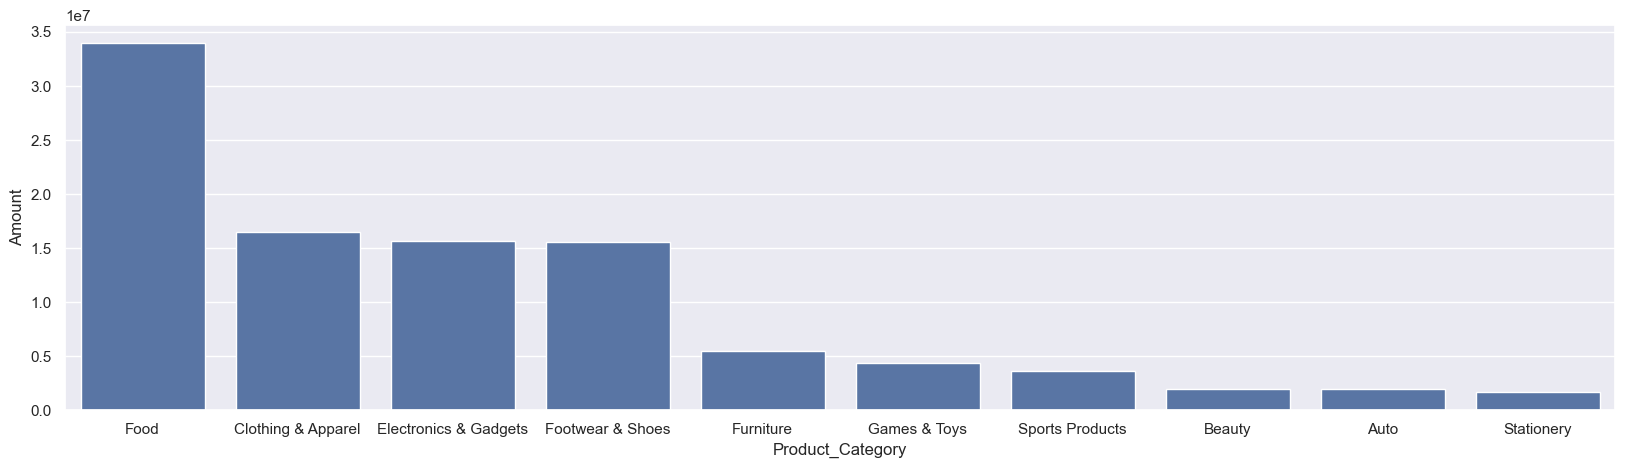

In [89]:
sales_product = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20, 5)})

sns.barplot(data = sales_product, x = 'Product_Category', y = 'Amount')

From the graph we can see that most products sold are from the Food, Clothing and Electronics category.

<Axes: xlabel='Product_Category', ylabel='Orders'>

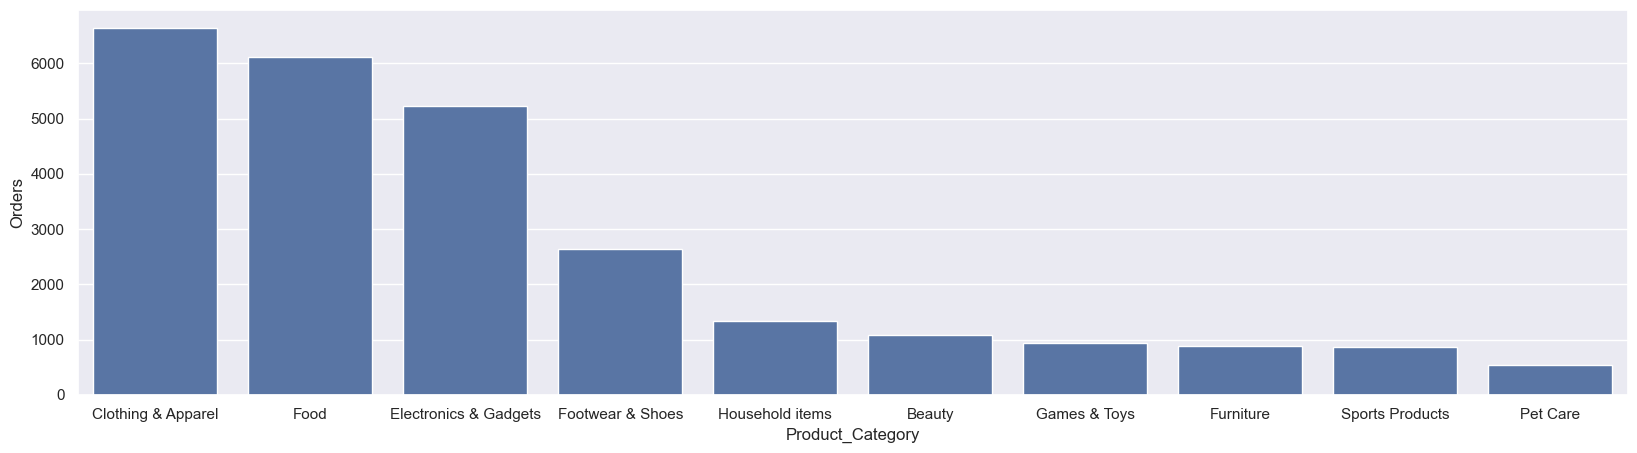

In [91]:
orders_product = df.groupby(['Product_Category'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20, 5)})

sns.barplot(data = orders_product, x = 'Product_Category', y = 'Orders')

<Axes: xlabel='Product_ID', ylabel='Orders'>

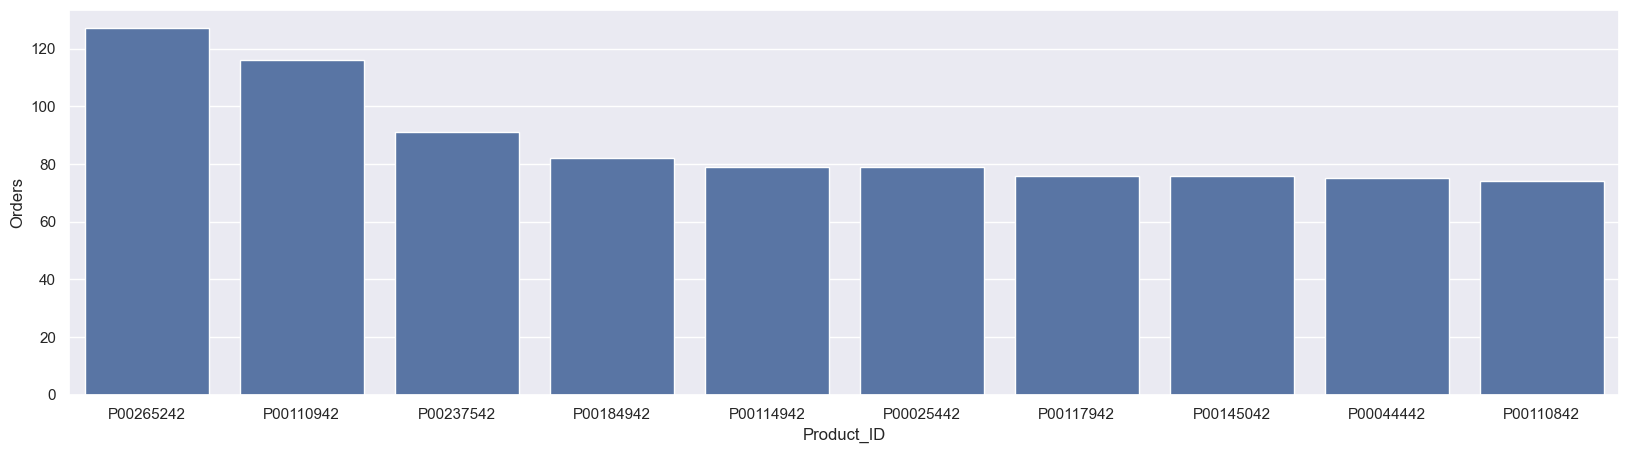

In [92]:
#Top 10 most sold products

orders_product = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20, 5)})

sns.barplot(data = orders_product, x = 'Product_ID', y = 'Orders')

Conclusion:

Married women between the age group of 26 - 35 years from Uttar Pradesh, Karnataka and Maharashtra working in IT, Healthcare and Aviation industries are more likely to buy products from food, clothing and electronics category. 